In [5]:
# Initialize Otter
import otter
grader = otter.Notebook("hw08.ipynb")

# Homework 8: Linear Regression

**Helpful Resource:**

- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in *Foundations of Data Science*

**Recommended Readings**: 

* [The Regression Line](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)
* [Method of Least Squares](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html)
* [Least Squares Regression](https://www.inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Note: This homework has hidden tests on it. Additional tests will be run once your homework is submitted for grading. While you may pass all the tests you have access to before submission, you may not earn full credit if you do not pass the hidden tests as well.**. 

Many of the tests you have access to before submitting only test to ensure you have given an answer that is formatted correctly and/or you have given an answer that *could* make sense in context. For example, a test you have access to while completing the assignment may check that you selected a valid choice for a multiple choice problem (1, 2, or 3) or that your answer is an integer between 0 and 50 if asked to count a subset of states in the United States. The tests that are run after submission will evaluate your work for accuracy. **Do not assume that just because all your tests pass before submission means that your answers are correct!**

Consult with your teacher and course syllabus for information and policies regarding appropriate collaboration with other students, appropriate use of AI tools, and submission of late work.

In [6]:
# Run this cell to set up the notebook, but please don't change it.

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime

## 1. Triple Jump Distances vs. Vertical Jump Heights 

Does skill in one sport imply skill in a related sport?  The answer might be different for different activities. Let's find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (a horizontal jump similar to a long jump) and the [vertical jump](https://en.wikipedia.org/wiki/Vertical_jump).  Since we're learning about linear regression, we will look specifically for a *linear* association between skill level in the two sports.

The following data was collected by observing 40 collegiate-level soccer players. Each athlete's distances in both events were **measured in centimeters**. Run the cell below to load the data.

In [7]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


### Question 1.1.

Create a function `standard_units` that accepts an array, which will be assigned to the variable `data`, and returns an array of the values in `data` that have been converted to standard units.

In [8]:
def standard_units(data):
    return (data -np.mean(data)) /np.std(data)

In [9]:
grader.check("q1_1")

q1_1 results: All test cases passed!
q1_1 - 1 message: ✅ `standard_units` returns an array with a mean of 0
q1_1 - 2 message: ✅ `standard_units` returns an array with a standard deviation of 1
q1_1 - 3 message: ✅ `standard_units` returns correct values for the array [1,2,3,4,5]

### Question 1.2.
Using the `standard_units` function, define the function `correlation` which accepts two arrays which will be assigned to `x` and `y`, and computes and returns the correlation between the values in `x` and `y`.

In [12]:
def correlation(x, y):
    xstandard_units = standard_units(x)
    ystandard_units = standard_units(y)
    return np.mean(xstandard_units * ystandard_units)

In [13]:
grader.check("q1_2")

q1_2 results: All test cases passed!
q1_2 - 1 message: ✅ `correlation` returns a correct value for the first test case
q1_2 - 2 message: ✅ `correlation` returns a correct value for the second test case

<!-- BEGIN QUESTION -->

### Question 1.3.
Before running a regression, it's important to visually inspect the data as our eyes are good at picking out unusual patterns in data.  Create a scatter plot, **that includes the regression line**, with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis.

*Hint:* The `fit_line` argument may be useful here! See the documentation on `scatter` [here](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for instructions on how to have Python draw the regression line automatically.

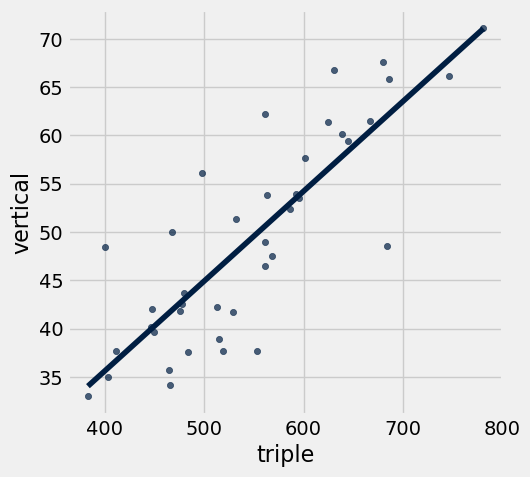

In [14]:
jumps.scatter('triple', 'vertical', fit_line=True)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.4.

Using the scatter plot and regression line in the previous question, estimate the correlation coefficient $r$. Explain what visual characteristics led to your estimation.

_Given the close clustering of points around the regression line and the positive slope, the correlation coefficient r can be estimated to be around 0.7. The points are somewhat close the line and there aren't significant outliers._

<!-- END QUESTION -->

### Question 1.5.
Create a function called `parameter_estimates` that takes in the argument `tbl`, a two-column table where the first column will be considered x-values and the second column will be considered y-values. The function should return an array with three elements: 

1. **correlation coefficient** of the two variables
2. the **slope** and
3. the **intercept** of the regression line that predicts the second column from the first, in original units.

The provided code will construct and return the array that contains `r`, `slope`, and `intercept`. You only need to compute the values in the body of the function.

*Hint:* This is a rare occasion where it's better to implement the function using column indices (e.g. `tbl.column(0)` instead of column names (e.g. `tbl.column('triple')`). Using indices allows you to call this function on any table, since you aren't making reference to labels that are specific to any one Table. If you need a reminder about how to use column indices to pull out individual columns, please refer to [this](https://www.inferentialthinking.com/chapters/06/Tables.html#accessing-the-data-in-a-column) section of the textbook.

In [15]:
def parameter_estimates(tbl):
    x = tbl.column(0)
    y = tbl.column(1)
    r = correlation(x, y)
    slope = r * (np.std(y) / np.std(x))
    intercept = np.mean(y) - slope * np.mean(x)
    return make_array(r, slope, intercept)

parameters = parameter_estimates(jumps) 
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837598 ; slope: 0.09295728160512184 ; intercept: -1.566520972963474


In [16]:
grader.check("q1_5")

q1_5 results: All test cases passed!
q1_5 - 1 message: ✅ `parameters` is an array
q1_5 - 2 message: ✅ `parameters` contains all 3 elements
q1_5 - 3 message: ✅ `parameters` is computing the correlation coefficient correctly

### Question 1.6.

Use the values contained in the `parameters` array to predict what an athlete's vertical jump height would be given their triple jump distance.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. Assign the prediction from the regression line for Edwards' vertical to `triple_record_vert_est`. Your prediction should be in centimeters.

*Hint:* Make sure to convert from meters to centimeters!

In [17]:
triple_record_vert_est = parameters.item(1) * (18.29 * 100) + parameters.item(2)
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 168.452347 centimeters


In [18]:
grader.check("q1_6")

q1_6 results: All test cases passed!
q1_6 - 1 message: ✅ `triple_record_vert_est` is somwhat close to (and actually might be!) the correct answer

<!-- BEGIN QUESTION -->

### Question 1.7.

Do you think this model is reasonable to use to predict Edwards' vertical jump? Why or why not? Use specific characteristics of the `jumps` data, the regression line, and Johnathan Edwards' record setting jump to support your explanation.

_This model may not be the most reasonable to use in order to predict Edwards' vertical jump because the way it sources data. It uses data from soccer players who are not training in the same way Edwards is. Thus it will be different. For example his record-setting jump is an extreme outlier and beyond the scope of the dataset, thus we can't assume the relationship continues _

<!-- END QUESTION -->

### Question 1.8.
Suppose you want to go the other way and predict a triple jump distance given a vertical jump distance. Think about how the regression parameters would change from the model that predicts vertical jump distance from triple jump distance.

Set `regression_changes` to an array of 3 elements, with each element corresponding to whether or not the corresponding item returned by `parameter_estimates` changes when switching vertical and triple as $x$ and $y$. For example, if $r$ changes, the slope changes, but the intercept wouldn't change, the `regression_changes` would be assigned to `make_array(True, True, False)`.

In [21]:
regression_changes =make_array(False, True, True)
regression_changes

array([0, 1, 1])

In [22]:
grader.check("q1_8")

q1_8 results: All test cases passed!
q1_8 - 1 message: ✅ `regression_changes` is an array with 3 elements
q1_8 - 2 message: ✅ `regression_changes` only contains True and False values

## 2. Cryptocurrencies

Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable cryptocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attached to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$10,859.56$ and one ETH costs $\$424.64.$

For fun, here are the current prices of [Bitcoin](https://www.coinbase.com/price/bitcoin) and [Ethereum](https://www.coinbase.com/price/ethereum)!

**You want to predict the price of ETH at some point in time based on the price of BTC.** Below, we load two [tables](https://www.kaggle.com/jessevent/all-crypto-currencies/data) called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [23]:
btc = Table.read_table('btc.csv')
btc.show(5)

date,open,close,market,day
2015-09-29,239.02,236.69,3505090000,1
2015-09-30,236.64,236.06,3471280000,2
2015-10-01,236,237.55,3462800000,3
2015-10-02,237.26,237.29,3482190000,4
2015-10-03,237.2,238.73,3482100000,5


In [24]:
eth = Table.read_table('eth.csv')
eth.show(5)

date,open,close,market,day
2015-09-29,0.579414,0.661146,42607700,1
2015-09-30,0.661192,0.738644,48636600,2
2015-10-01,0.734307,0.690215,54032300,3
2015-10-02,0.683732,0.678574,50328700,4
2015-10-03,0.678783,0.687171,49981900,5


<!-- BEGIN QUESTION -->

### Question 2.1.

In the cell below, create a Table named `both` that contains the columns `"day"` and `"open"` from the `btc` Table, and the column `"open"` from the `eth` Table. Rename the `"open"` columns as "btc open" and "eth open" respectively. Then, use this Table to create an overlaid line plot that visualizes the BTC and ETH open prices versus the value in the `"day"` column. Both BTC and ETH open prices should be plotted on the same graph.

*Hint*: [Section 7.3](https://inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html#overlaid-line-plots) provides an example of creating an overlaid graph if you need a refresher.

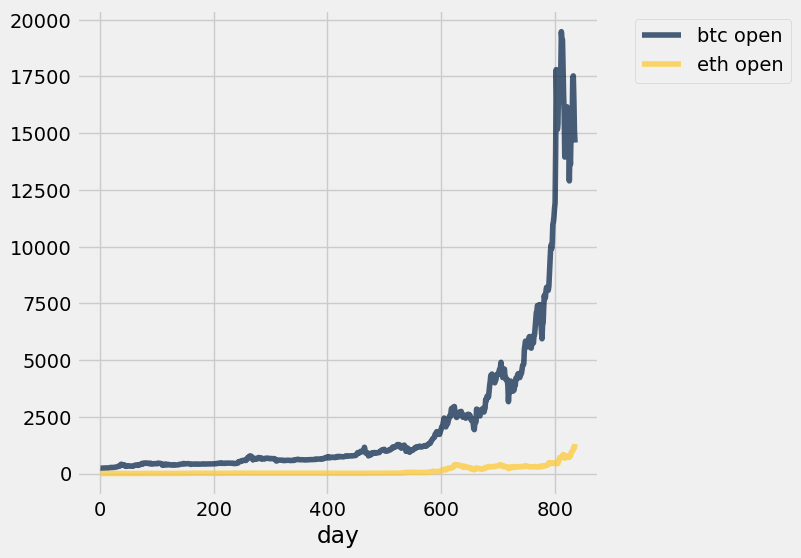

In [25]:
# Create a line plot of btc and eth open prices as a function of time
both = btc.select("day", "open").with_column("eth open", eth.column("open"))
both = both.relabeled("open", "btc open")
both.plot("day")

<!-- END QUESTION -->

### Question 2.2.

Now, calculate the correlation coefficient between the opening prices of BTC and ETH from the `both` Table using the `correlation` function you defined earlier, and assign the value to `r`.


In [26]:
r = correlation(both.column("btc open"), both.column("eth open"))
r

0.92503257641482783

In [27]:
grader.check("q2_2")

q2_2 results: All test cases passed!
q2_2 - 1 message: ✅ `both` has exactly 3 columns
q2_2 - 2 message: ✅ `both` has the correct labels for the 3 columns
q2_2 - 3 message: ✅ `r` is between -1 and 1

### Question 2.3.

Write a function `eth_predictor` which takes an opening BTC price and a Table with the BTC and ETH opening price information, and returns a prediction for the opening price of ETH. Use the function `parameter_estimates` that you defined earlier in this assignment to generate the necessary parameters for the predication.

*Hint*: Recall that the Table passed to the `parameter_estimates` must have only 2 columns. Be sure to drop any unnecessary columns from the Table you pass to `eth_predictor` so when you use the `parameters` on the `price_table`, it only has the two columns required.

*Note:* Make sure that your `eth_predictor` is using least squares linear regression.


In [28]:
def eth_predictor(btc_price):
    parameters = parameter_estimates(both.drop("day"))
    slope = parameters.item(1) 
    intercept = parameters.item(2) 
    return slope * btc_price + intercept

eth_predictor(10)

2.6421542032063714

In [29]:
grader.check("q2_3")

q2_3 results: All test cases passed!
q2_3 - 1 message: ✅ `eth_predictor` is making predictions that are close (and maybe exactly) what is expected

<!-- BEGIN QUESTION -->

### Question 2.4.

Now, using the `eth_predictor` function you just defined, create a Table, `eth_pred_actual` that contains 3 columns:
* `"btc open"`: the BTC opening prices,
* `"predicted eth open"`: the predicted ETH opening prices, and
* `"actual eth open"`: the actual ETH opening prices.

You can complete this process in several intermediate steps, as long as `eth_pred_actual` contains a Table with these exact column labels and corresponding values. You should use the `apply` method and the `eth_predictor` function to quickly compute the predicted values for ETH in the Table.

Then, the provided code will make a scatter plot with BTC prices along the x-axis and both real and predicted ETH prices along the y-axis.

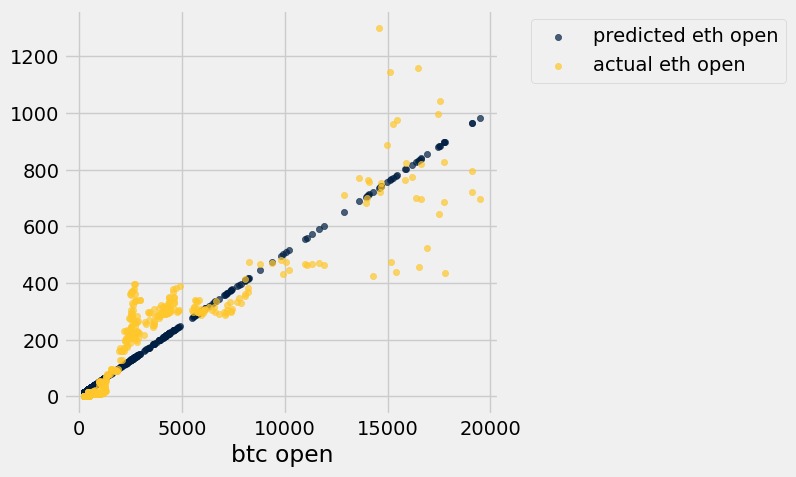

In [34]:
btc_open = btc.column('open')
eth_pred = btc.apply(eth_predictor, 'open')
eth_pred_actual = Table().with_columns(
    'btc open', btc_open,
    'predicted eth open', eth_pred,
    'actual eth open', both.column("eth open")
)
eth_pred_actual.scatter('btc open')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2.5.

Considering the shape of the scatter plot of the true data and the predicted values from the regression model, is the model we used reasonable? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable?

_The model we used is appropriate as there is a positive correlation between the actual price of ETH and the actual price of BTC. Therefore, a positive regression line can be used to predict the price of ETH based on the actual price of BTC._

<!-- END QUESTION -->

## 3. Evaluating NBA Game Predictions

#### A Brief Introduction to Sports Betting

In a basketball game, each team scores some number of points.  Conventionally, the team playing at its own arena is called the "home team", and their opponent is called the "away team".  The winner is the team with more points at the end of the game.

We can summarize what happened in a game by the "**outcome**", defined as the **the away team's score minus the home team's score**:

$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

If this number is positive, the away team won.  If it's negative, the home team won. 

In order to facilitate betting on games, analysts at casinos try to predict the outcome of the game. This *prediction* of the outcome is called the **spread.**


In [35]:
spreads = Table.read_table("spreads.csv")
spreads

Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread
4/10/2015,Utah,Memphis,88,89,1,2.5
3/10/2015,Utah,New York,87,82,-5,-13
11/19/2014,Indiana,Charlotte,88,86,-2,-2
11/15/2014,Chicago,Indiana,90,99,9,-9
3/25/2015,Utah,Portland,89,92,3,-2
3/3/2015,Memphis,Utah,82,93,11,-7
3/18/2015,Utah,Washington,84,88,4,-3
3/16/2015,Utah,Charlotte,94,66,-28,-4.5
1/24/2015,Charlotte,New York,76,71,-5,-9
11/7/2014,Oklahoma City,Memphis,89,91,2,7


Here's a scatter plot of the outcomes and spreads, with the spreads on the horizontal axis.

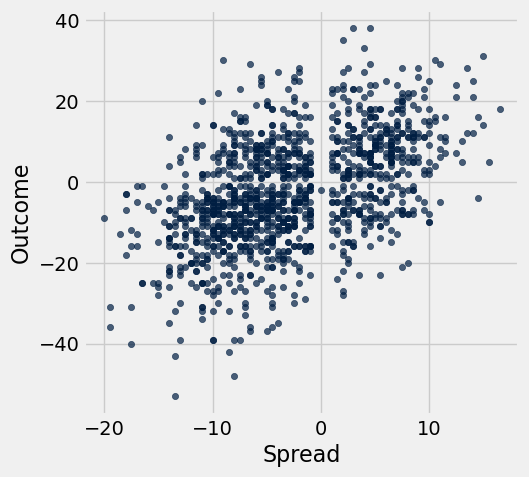

In [36]:
spreads.scatter("Spread", "Outcome")

From the scatter plot, you can see that the spread and outcome are almost never 0, aside from one case of the spread being 0. This is because a game of basketball never ends in a tie. One team has to win, so the outcome can never be 0. The spread is almost never 0 because a spread is chosen to estimate the outcome of a game, and since a tie is not possible no one would predict a tie as the final outcome.

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In other words, for every value of the spread, is the average outcome of games assigned that spread equal to the spread? If not, the casino would apparently be making a systematic error in its predictions.

### Question 3.1.

Let's see how good the casinos are at predicting the outcomes. Among games with a spread between 3.5 and 6.5 (including both 3.5 and 6.5), what was the average outcome?

In [44]:
spreads_around_5 = spreads.where('Spread', are.between_or_equal_to(3.5,6.5))
spread_5_outcome_average = np.average((spreads_around_5).column('Outcome'))
print("Average outcome for spreads around 5:", spread_5_outcome_average)

Average outcome for spreads around 5: 4.99411764706


In [45]:
grader.check("q3_1")

q3_1 results: All test cases passed!
q3_1 - 1 message: ✅ `spread_5_outcome_average` is close to (and might be exactly) the expected outcome average

### Question 3.2.

Suppose you think there is a linear relationship between outcomes and spreads. Compute the correlation coefficient between these variables.

*Note:* It might be helpful to use the `correlation` function.

In [46]:
spread_r = correlation(spreads.column("Spread"), spreads.column("Outcome"))
spread_r

0.49181413688314235

In [47]:
grader.check("q3_2")

q3_2 results: All test cases passed!
q3_2 - 1 message: ✅ `spread_r` is close to (and might be exactly) the expected correlation coefficient

### Question 3.3.

Use the function `parameter_estimates` that you defined earlier to compute the slope and intercept of the least-squares linear regression line that predicts outcomes from spreads, in original units. 

The provided code will generate a two column Table for you named `compute_tbl` with the first column representing `Spread` (x) and the second column representing `Outcome` (y). You should use this Table as an input to the `parameter_estimates` function.

In [48]:
compute_tbl = spreads.select('Spread', 'Outcome')
estimates = parameter_estimates(compute_tbl)
spread_slope = estimates.item(1)
spread_intercept = estimates.item(2)
print("Slope:", round(spread_slope, 3))
print("Intercept", round(spread_intercept, 3))

Slope: 0.954
Intercept 0.22


In [49]:
grader.check("q3_3")

q3_3 results: All test cases passed!
q3_3 - 1 message: ✅ `spread_slope` is close to (and might be exactly) the expected slope
q3_3 - 2 message: ✅ `spread_intercept` is close to (and might be exactly) the expected intercept

### Question 3.4.

Define a function called `errors`.  It should take three arguments:
1. a table `tbl` that's formatted like `spreads`. You can assume it will have the same column names and meanings, but not necessarily the same data.
2. the `slope` of a line (a number)
3. the `intercept` of a line (a number).

It should **return an array of the errors** made when a line with that slope and intercept is used to predict outcome from spread for each game in the given table.

*Hint*: Use array operations with the `slope` and `predictions` to quickly make predictions for all the outcomes, and to then compute the errors that you'll return.

In [50]:
def errors(tbl, slope, intercept):
    predictions = tbl.column('Spread') * slope + intercept
    errors = tbl.column('Outcome') - predictions
    return errors

In [51]:
grader.check("q3_4")

q3_4 results: All test cases passed!
q3_4 - 1 message: ✅ `errors` returns an array
q3_4 - 2 message: ✅ `errors` returns the correct number of errors, 1230
q3_4 - 3 message: ✅ `errors` returns an array of numerical values

<!-- BEGIN QUESTION -->

### Question 3.5.

Using `errors`, compute the errors when using the slope and intercept for the least squares regression line on the `spreads` dataset. Name that array `outcome_errors`.  Then, make a scatter plot of the errors. 

*Hint:* To make a scatter plot of the errors, plot the error for each predicted outcome in the dataset.  Put the actual spread on the horizontal axis and the outcome error on the vertical axis.

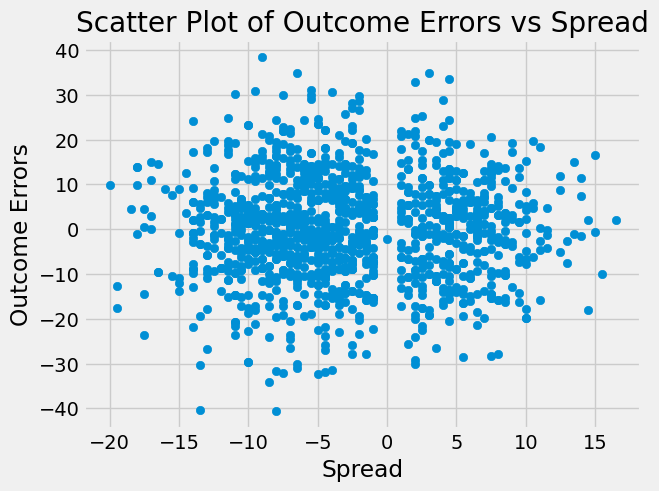

In [55]:
outcome_errors = errors(spreads, spread_slope, spread_intercept)
spreads_values = spreads.column('Spread')
plt.scatter(spreads_values, outcome_errors)
plt.xlabel('Spread')
plt.ylabel('Outcome Errors')
plt.title('Scatter Plot of Outcome Errors vs Spread')
plt.grid(True)
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 3.6.

What does the scatterplot of errors, also known as a residual plot, from the previous question indicate about the model's ability to make predictions on the outcome of a game using the spreads generated by the casino? Are there any patterns in the residual plot that would indicate the model is performing better or worse at predicting outcomes for certain spreads? Cite specific evidence from the scatter plot in your response.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

# Submitting your work
You're done with this assignment! Assignments should be turned in using the following best practices:
1. Save your notebook.
2. Restart the kernel and run all cells up to this one.
3. Run the cell below with the code `grader.export(...)`. This will re-run all the tests. Make sure they are passing as you expect them to.
4. Download the file named `hw08_<date-time-stamp>.zip`, found in the explorer pane on the left side of the screen. **Note**: Clicking on the link in this notebook may result in an error, it's best to download from the file explorer panel.
5. Upload `hw08_<date-time-stamp>.zip` to the corresponding assignment on Canvas.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

In [ ]:
grader.export(pdf=False, force_save=True)